__1.__ Заполните пропуски и выбросы в наиболее проблемных признаках

In [1]:
import pandas as pd
l3d = pd.read_csv('train.csv')
y = l3d['Credit Default']

In [2]:
l3d.isnull().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [3]:
l3d.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [4]:
l3d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [5]:
num_features = ['Annual Income', 'Tax Liens', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 'Number of Credit Problems', 'Months since last delinquent', 'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score']
other_features = ['Home Ownership', 'Years in current job', 'Purpose', 'Term']

/home/mrp/anaconda3/envs/FR/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f40f70410>,
      dtype=object)

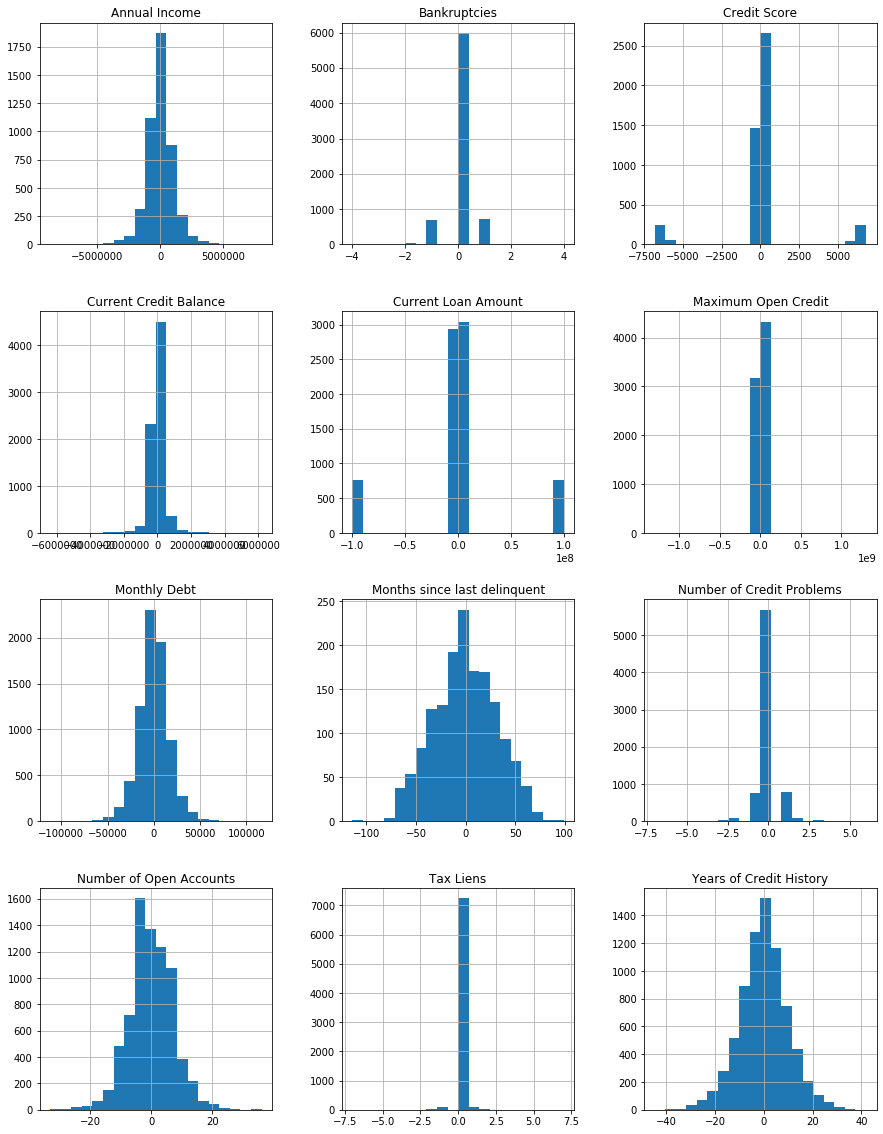

In [6]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
l3d[num_features].diff().hist(bins=20, ax=ax)

In [7]:
l3d['Annual Income'] = l3d['Annual Income'].fillna(l3d['Annual Income'].median())
l3d['Bankruptcies'] = l3d['Bankruptcies'].fillna(l3d['Bankruptcies'].median())

Выводы:
- признаки "Months since last delinquent" и "Credit Score" по смыслу не подходят для заполнения отсутствующих значени;
- графики визуально показывают выбросы, но по субъективной оценке ни на одном из графиков нельзя отдельно стоящие значения назвать выбросами из-за наличия воображаемого нормального распределения;
- на данном этапе не ясно как заполнять отсутствующие значения с типом данных "object".

__2.__ Переведите строковые признаки в числовое представление.

In [8]:
l3d['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [9]:
l3d = pd.concat([l3d, pd.get_dummies(l3d['Years in current job'])], axis=1)
l3d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 7500 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7500 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [10]:
l3d['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [11]:
l3d = pd.concat([l3d, pd.get_dummies(l3d['Term'])], axis=1)

In [12]:
l3d['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [13]:
l3d = pd.concat([l3d, pd.get_dummies(l3d['Purpose'])], axis=1)

Выводы:
- нет понимания в подходящем инструменте для заполнения признака "Years in current job" (LabelEncoder не подходит для строковой категории с числом в строке, pd.get_dummies создала огромное количество столбцов, другие инструмены не очень понятны);
- после использования get_dummies все пропуски заполняются нулями, что может быть не совсем корректно.

__3.__ Обучите любую модель на ваш выбор. Посчитайте метрику, которая подходит для задачи классификации.

In [14]:
l3d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 7500 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7500 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [15]:
from sklearn.model_selection import train_test_split
X = l3d.drop(other_features, axis=1)
y = l3d['Credit Default']
X.drop(['Credit Default'], axis=1, inplace=True)
X['Months since last delinquent'] = X['Months since last delinquent'].fillna(0)
X['Credit Score'] = X['Credit Score'].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    random_state=21,
                                                    stratify=y
                                                   )

display(y_train.value_counts(normalize=True), y_test.value_counts(normalize=True))

0    0.718286
1    0.281714
Name: Credit Default, dtype: float64

0    0.718222
1    0.281778
Name: Credit Default, dtype: float64

In [16]:
from sklearn.metrics import classification_report

def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

def evaluate_preds(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [17]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

evaluate_preds(model_lr, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      3771
           1       0.84      0.21      0.33      1479

    accuracy                           0.77      5250
   macro avg       0.80      0.60      0.59      5250
weighted avg       0.78      0.77      0.71      5250

TEST

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      1616
           1       0.82      0.20      0.32       634

    accuracy                           0.76      2250
   macro avg       0.79      0.59      0.59      2250
weighted avg       0.77      0.76      0.70      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1588   28
1                508  126


Выводы:
- нет понимания правильности заполнения признаков нулями;
- наименьшая метрика равна 0.59, что для "боевой" задачи недостаточно;
- болшое количество характеристик (для дополнительного изучения), которые еще не усвоил.

__4.__ Сделайте балансировку данных с помощью пройденных на уроке подходов и еще раз обучите модель.

In [18]:
def balance_df_by_target(df, target_name, method='over'):

    assert method in ['over', 'under', 'tomek', 'smote'], 'Неверный метод сэмплирования'
    
    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1
    if method == 'over':
        for i in range(disbalance_coeff):
            sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
            df = df.append(sample, ignore_index=True)
            
    elif method == 'under':
        df_ = df.copy()
        df = df_[df_[target_name] == minor_class_name]
        tmp = df_[df_[target_name] == major_class_name]
        df = df.append(tmp.iloc[
            np.random.randint(0, tmp.shape[0], target_counts[minor_class_name])
        ], ignore_index=True)

    elif method == 'tomek':
        from imblearn.under_sampling import TomekLinks
        tl = TomekLinks()
        X_tomek, y_tomek = tl.fit_resample(df.drop(columns=target_name), df[target_name])
        df = pd.concat([X_tomek, y_tomek], axis=1)
    
    elif method == 'smote':
        from imblearn.over_sampling import SMOTE
        smote = SMOTE()
        X_smote, y_smote = smote.fit_resample(df.drop(columns=target_name), df[target_name])
        df = pd.concat([X_smote, y_smote], axis=1)

    return df.sample(frac=1) 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    random_state=21,
                                                    stratify=y
                                                   )

df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, 'Credit Default', method='over')
    
df_balanced['Credit Default'].value_counts()

0    3771
1    2958
Name: Credit Default, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced.drop(['Credit Default'], axis=1), df_balanced['Credit Default'], 
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    random_state=21,
                                                    stratify=df_balanced['Credit Default']
                                                   )
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

evaluate_preds(model_lr, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.65      0.79      0.72      2640
           1       0.64      0.46      0.54      2070

    accuracy                           0.65      4710
   macro avg       0.65      0.63      0.63      4710
weighted avg       0.65      0.65      0.64      4710

TEST

              precision    recall  f1-score   support

           0       0.66      0.76      0.71      1131
           1       0.62      0.50      0.56       888

    accuracy                           0.65      2019
   macro avg       0.64      0.63      0.63      2019
weighted avg       0.64      0.65      0.64      2019

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               862  269
1               443  445


In [21]:
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    random_state=21,
                                                    stratify=y
                                                   )

df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, 'Credit Default', method='under')
    
df_balanced['Credit Default'].value_counts()

1    1479
0    1479
Name: Credit Default, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced.drop(['Credit Default'], axis=1), df_balanced['Credit Default'], 
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    random_state=21,
                                                    stratify=df_balanced['Credit Default']
                                                   )
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

evaluate_preds(model_lr, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.62      0.58      0.60      1035
           1       0.61      0.64      0.62      1035

    accuracy                           0.61      2070
   macro avg       0.61      0.61      0.61      2070
weighted avg       0.61      0.61      0.61      2070

TEST

              precision    recall  f1-score   support

           0       0.62      0.55      0.58       444
           1       0.60      0.66      0.63       444

    accuracy                           0.61       888
   macro avg       0.61      0.61      0.60       888
weighted avg       0.61      0.61      0.60       888

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               246  198
1               152  292


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    random_state=21,
                                                    stratify=y
                                                   )
classification_report
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, 'Credit Default', method='tomek')
    
df_balanced['Credit Default'].value_counts()

0    3232
1    1479
Name: Credit Default, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced.drop(['Credit Default'], axis=1), df_balanced['Credit Default'], 
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    random_state=21,
                                                    stratify=df_balanced['Credit Default']
                                                   )
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

evaluate_preds(model_lr, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.74      0.96      0.83      2262
           1       0.75      0.25      0.37      1035

    accuracy                           0.74      3297
   macro avg       0.74      0.60      0.60      3297
weighted avg       0.74      0.74      0.69      3297

TEST

              precision    recall  f1-score   support

           0       0.74      0.97      0.84       970
           1       0.80      0.25      0.38       444

    accuracy                           0.74      1414
   macro avg       0.77      0.61      0.61      1414
weighted avg       0.76      0.74      0.70      1414

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               942   28
1               333  111


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    random_state=21,
                                                    stratify=y
                                                   )

df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, 'Credit Default', method='smote')
    
df_balanced['Credit Default'].value_counts()

1    3771
0    3771
Name: Credit Default, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced.drop(['Credit Default'], axis=1), df_balanced['Credit Default'], 
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    random_state=21,
                                                    stratify=df_balanced['Credit Default']
                                                   )
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

evaluate_preds(model_lr, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.64      0.62      0.63      2640
           1       0.63      0.65      0.64      2639

    accuracy                           0.63      5279
   macro avg       0.63      0.63      0.63      5279
weighted avg       0.63      0.63      0.63      5279

TEST

              precision    recall  f1-score   support

           0       0.63      0.60      0.62      1131
           1       0.62      0.64      0.63      1132

    accuracy                           0.62      2263
   macro avg       0.62      0.62      0.62      2263
weighted avg       0.62      0.62      0.62      2263

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               684  447
1               407  725


Вывод:
- количество инструментов DS требует серьезного подхода к их изучению, тогда возможно получать полезные результаты.